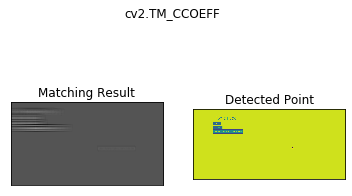

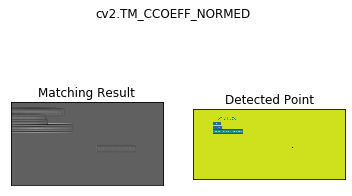

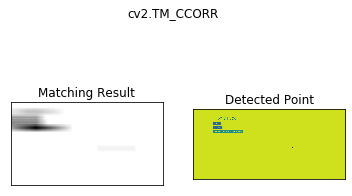

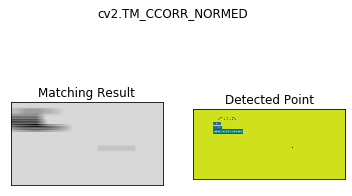

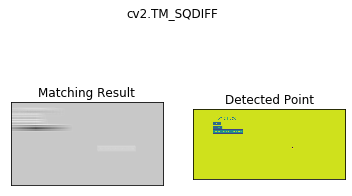

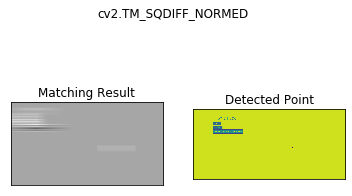

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('DEBUG_IMAGE_draggabke.jpg',0)
img2 = img.copy()
template = cv2.imread('Unlock_Draggable.png',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, (51, 51, 255), 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [6]:
import os
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

print( detect_text('DEBUG_IMAGE.jpg') )

Texts:
[locale: "en"
description: "Register\nComplete the following fields\nvame\nEmail\nPassword\nREGISTER\n"
bounding_poly {
  vertices {
    x: 286
    y: 110
  }
  vertices {
    x: 1277
    y: 110
  }
  vertices {
    x: 1277
    y: 467
  }
  vertices {
    x: 286
    y: 467
  }
}
, description: "Register"
bounding_poly {
  vertices {
    x: 303
    y: 110
  }
  vertices {
    x: 366
    y: 110
  }
  vertices {
    x: 366
    y: 126
  }
  vertices {
    x: 303
    y: 126
  }
}
, description: "Complete"
bounding_poly {
  vertices {
    x: 303
    y: 138
  }
  vertices {
    x: 360
    y: 138
  }
  vertices {
    x: 360
    y: 151
  }
  vertices {
    x: 303
    y: 151
  }
}
, description: "the"
bounding_poly {
  vertices {
    x: 365
    y: 138
  }
  vertices {
    x: 383
    y: 138
  }
  vertices {
    x: 383
    y: 148
  }
  vertices {
    x: 365
    y: 148
  }
}
, description: "following"
bounding_poly {
  vertices {
    x: 388
    y: 137
  }
  vertices {
    x: 442
    y: 137
 

In [12]:
from google.cloud import vision
import io
    
def detect_text(content):
    """Detects text in the file."""
   
    client = vision.ImageAnnotatorClient()

   

    image = vision.types.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

path = 'DEBUG_IMAGE.jpg'
with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
detect_text(content)

Texts:

"Register
Complete the following fields
vame
Email
Password
REGISTER
"
bounds: (286,110),(1277,110),(1277,467),(286,467)

"Register"
bounds: (303,110),(366,110),(366,126),(303,126)

"Complete"
bounds: (303,138),(360,138),(360,151),(303,151)

"the"
bounds: (365,138),(383,138),(383,148),(365,148)

"following"
bounds: (388,137),(442,137),(442,152),(388,152)

"fields"
bounds: (447,138),(478,138),(478,148),(447,148)

"vame"
bounds: (289,195),(330,194),(330,205),(289,206)

"Email"
bounds: (289,277),(328,277),(328,287),(289,287)

"Password"
bounds: (286,356),(355,356),(355,369),(286,369)

"REGISTER"
bounds: (1224,454),(1277,456),(1277,467),(1224,465)
